# Описание проекта
Система, которая могла бы оценить риск ДТП по выбранному маршруту движения. Под риском понимается вероятность ДТП с любым повреждением
транспортного средства. Как только водитель забронировал автомобиль, сел за руль и выбрал маршрут, система должна
оценить уровень риска. Если уровень риска высок, водитель увидит предупреждение и рекомендации по маршруту.

## Идея решения:

1. Создать модель предсказания ДТП (целевое значение — **at_fault (виновник)** в таблице **parties)**
    - Для модели выбрать тип виновника — только машина (**car**).
    - Выбрать случаи, когда ДТП привело к любым повреждениям транспортного средства, кроме типа SCRATCH (царапина).
    - Для моделирования ограничиться данными за 2012 год — они самые свежие.
    - Обязательное условие — учесть фактор возраста автомобиля.
2. На основе модели исследовать основные факторы ДТП.
3. Понять, помогут ли результаты моделирования и анализ важности факторов ответить на вопросы:
    - Возможно ли создать адекватную системы оценки водительского риска при выдаче авто?
    - Какие ещё факторы нужно учесть?
    - Нужно ли оборудовать автомобиль какими-либо датчиками или камерой?

### Последовательность действий

#### **Шаг 1. Загрузим таблицы SQL**

Подключимся к базе данных и загрузим таблицы в pandas DataFrame. Для этого используем библиотеку sqlalchemy.

#### **Шаг 2. Проведем первичное исследование таблиц**

- Все ли таблицы имеют набор данных;
- Соответствует ли количество таблиц условию задачи;
- Имеется ли общий ключ для связи таблиц.

#### **Шаг 3. Проведем статистический анализ факторов ДТП**

1. Выясним, в какие месяцы происходит наибольшее количество аварий. Проанализируем весь период наблюдений (таблица **collisions)**.
    - Создадим sql-запрос;
    - Построим график;
    - Сделаем вывод.
2. Скоро состоится первое совещание рабочей группы. Чтобы обсуждение было конструктивным, каждый сотрудник должен понимать данные. Для этого мы должны создать подходящие аналитические задачи и поручить их решение коллегам. Примеры задач:
    - Проведите анализ серьёзности повреждений транспортного средства, исходя из состояния дороги в момент ДТП (связать **collisions** и **parties**);
    - Найдите самые частые причины ДТП (таблица **parties**).

3. Создадим не менее шести задач для коллег. Будем опираться на примеры и таблицы.

4. Пропишем порядок решения для двух задач из списка. Реализуем его. Обязательное условие — решение этих задач должно включать связь не менее 2-х таблиц. Пример прописанного порядка:

- Создадим sql-запрос;
- Построим график;
- Сделаем вывод.

#### **Шаг 4. Создадим модель для оценки водительского риска**

1. Подготовим набор данных на основе первичного предположения заказчика:

    - Выберем тип виновника — только машина (**car**).
    - Возьмем случаи, когда ДТП привело к любым значимым повреждениям автомобиля любого из участников — все, кроме типа SCRATCH (царапина).
    - Для моделирования возьмем данные только за 2012 год.
    - Подготовка исходной таблицы должна проводиться с помощью sql-запроса.

2. Проведем первичный отбор факторов, необходимых для модели. Изучим описание факторов. Нужно отобрать те, которые могут влиять на вероятность ДТП. Аргументируем свой выбор. Например, состояние водителя до начала поездки (трезвость или приём лекарств) не измеряется и не может быть использовано в модели.

3. Проведем статистическое исследование отобранных факторов.
    - По результату исследовательского анализа внесем корректировки, если они нужны. Сделаем вывод.
    - Если необходимо, категоризируем исходные данные, проведем масштабирование.
    - Подготовим обучающую и тестовую выборки.

#### **Шаг 5. Найдем лучшую модель**

1. Смоделируем не менее 3-х типов моделей с перебором гиперпараметров.
2. Выберем метрику для оценки модели, исходя из поставленной бизнесом задачи.
3. Оформим вывод в виде сравнительной таблицы.

#### Шаг 6. Проверим лучшую модель в работе

1. Проведем графический анализ «Матрица ошибок». Выведем полноту и точность на график.
2. Проанализируем важность основных факторов, влияющих на вероятность ДТП.
3. Для одного из выявленных важных факторов проведем дополнительное исследование:
    - Покажем график зависимости фактора и целевой переменной.
    - Предложим, чем можно оборудовать автомобиль, чтобы учесть этот фактор во время посадки водителя.


#### Шаг 7. Сделаем общий вывод по модели

- Кратко опишем лучшую модель.
- Сделаем вывод: насколько возможно создание адекватной системы оценки риска при выдаче авто?
- Какие факторы ещё необходимо собирать, чтобы улучшить модель?

### Краткое описание таблиц

- **collisions** — общая информация о ДТП.
    Имеет уникальный case_id. Эта таблица описывает общую информацию о ДТП. Например, где оно произошло и когда.
- **parties** — информация об участниках ДТП.
    Имеет неуникальный case_id, который сопоставляется с соответствующим ДТП в таблице **collisions**. Каждая строка здесь описывает одну из сторон, участвующих в ДТП. Если столкнулись две машины, в этой таблице должно быть две строки с совпадением case_id. Если нужен уникальный идентификатор, это case_id and party_number.
- **vehicles** — информация о пострадавших машинах.
    Имеет неуникальные case_id и неуникальные party_number, которые сопоставляются с таблицей **collisions** и таблицей **parties**. Если нужен уникальный идентификатор, это case_id and party_number.


In [1]:
# imports
from sqlalchemy import create_engine

# Обработка данных:
import pandas as pd
import numpy as np

# Визуализация данных:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Настройки для воспроизводимости
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

## Подключение к базе данных. Загрузка таблицы SQL

Подключимся к базе данных и загрузим таблицы в pandas DataFrame. Для этого используем библиотеку sqlalchemy. После этого, проведем первичное исследование таблиц и статистический анализ факторов ДТП.

In [3]:
# Подключение к базе данных
from db_config_file import db_config

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)

engine = create_engine(connection_string)

### Первичное исследование таблиц

Проверим, что все таблицы имеют набор данных, соответствуют условию задачи и имеют общий ключ для связи.

In [4]:
# Объединяем таблицы в один DataFrame, чтобы проверить наличие данных и соответствие условиям задачи.
with open('queries/check.sql', 'r') as file:
    query = file.read()

# Выводим первые 20 строк объединенного DataFrame
pd.read_sql_query(query, engine)

,case_id,db_year,case_id,county_city_location,county_location,distance,direction,intersection,weather_1,location_type,...,vehicle_age,id,case_id,party_number,party_type,at_fault,insurance_premium,party_sobriety,party_drug_physical,cellphone_in_use
0,4023566,2021,4023566,4127,san mateo,0.0,None,1,clear,None,...,6,4049,4023566,2,road signs,0,40,not applicable,not applicable,0.0
1,4045976,2021,4045976,1942,los angeles,10.0,north,0,clear,None,...,12,23760,4045976,2,car,0,37,had not been drinking,None,0.0
2,4046925,2021,4046925,2706,monterey,42.0,east,0,clear,None,...,10,23978,4046925,1,building,0,64,had not been drinking,None,0.0
3,4059953,2021,4059953,1958,los angeles,0.0,None,1,clear,None,...,10,27197,4059953,2,road signs,0,63,had not been drinking,None,0.0
4,4060118,2021,4060118,1949,los angeles,10.0,east,0,clear,None,...,2,27494,4060118,2,road signs,0,18,had not been drinking,None,0.0
5,4078556,2021,4078556,1942,los angeles,0.0,None,1,clear,None,...,5,33893,4078556,2,road signs,0,33,had not been drinking,None,0.0
6,4090195,2021,4090195,1942,los angeles,0.0,None,1,clear,ramp,...,4,45836,4090195,2,building,0,26,had not been drinking,None,0.0
7,4091481,2021,4091481,4980,sonoma,0.0,None,1,clear,None,...,11,47708,4091481,2,road signs,0,71,had not been drinking,None,NaN
8,4091918,2021,4091918,4313,santa clara,0.0,None,1,clear,None,...,0,48036,4091918,2,road signs,1,5,had not been drinking,None,NaN
9,4092047,2021,4092047,4114,san mateo,250.0,south,0,clear,None,...,7,48258,4092047,1,building,1,46,had not been drinking,None,0.0


In [5]:
# Проверяем, можно ли объединить таблицы по party_number
with open('queries/second_check.sql', 'r') as file:
    query = file.read()

# Выводим первые 10 строк объединенного DataFrame
pd.read_sql_query(query, engine)

,id,case_id,party_number,vehicle_type,vehicle_transmission,vehicle_age,id,case_id,party_number,party_type,at_fault,insurance_premium,party_sobriety,party_drug_physical,cellphone_in_use
0,1175713,5305032,2,sedan,manual,3,23,3899454,2,road signs,0,7.0,had not been drinking,None,0.0
1,1175713,5305032,2,sedan,manual,3,29,3899462,2,car,0,21.0,had not been drinking,None,0.0
2,1175713,5305032,2,sedan,manual,3,31,3899465,2,road signs,0,24.0,had not been drinking,None,0.0
3,1175713,5305032,2,sedan,manual,3,41,3899478,2,road bumper,0,NaN,not applicable,not applicable,0.0
4,1175713,5305032,2,sedan,manual,3,43,3899481,2,road bumper,0,NaN,not applicable,not applicable,0.0
5,1175713,5305032,2,sedan,manual,3,72,3899505,2,road bumper,0,NaN,not applicable,not applicable,0.0
6,1175713,5305032,2,sedan,manual,3,93,3981292,2,road bumper,0,NaN,had not been drinking,None,NaN
7,1175713,5305032,2,sedan,manual,3,111,3982068,2,road bumper,0,NaN,not applicable,not applicable,0.0
8,1175713,5305032,2,sedan,manual,3,115,3982076,2,road bumper,0,NaN,None,None,NaN
9,1175713,5305032,2,sedan,manual,3,135,3982892,2,road bumper,0,NaN,not applicable,not applicable,0.0


### Статистический анализ факторов ДТП

1. Выясним, в какие месяцы происходит наибольшее количество аварий. Проанализируем весь период наблюдений (таблица **collisions)**.
    - Создадим sql-запрос;
    - Построим график;
    - Сделаем вывод.
2. Создадим 6 аналитических задач.
3. Пропишем порядок решения для двух задач из списка и реализуем его.

In [6]:
# Группируем количество ДТП по месяцам
with open('queries/collisions_by_month.sql', 'r') as file:
    query = file.read()

# Сохраняем датафрейм
collisions_by_month = pd.read_sql_query(query, engine)

# Преобразуем столбец 'month' в строку
collisions_by_month['month'] = collisions_by_month['month'].astype(int).astype(str)

# Выводим датафрейм
collisions_by_month

,month,total_accidents
0,1,132044
1,2,128858
2,3,139581
3,4,130180
4,5,130316
5,6,102594
6,7,102227
7,8,104089
8,9,105159
9,10,112237


In [7]:
print('Медианное количество ДТП', collisions_by_month['total_accidents'].median())
print('Максимальное количество ДТП', collisions_by_month['total_accidents'].max())
print('Общее количество ДТП', collisions_by_month['total_accidents'].sum())

Медианное количество ДТП 110091.0
Максимальное количество ДТП 139581
Общее количество ДТП 1400000


/var/folders/d5/3r484lmx4rx7jdlt6zl0_bkc0000gn/T/ipykernel_20445/1526682296.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


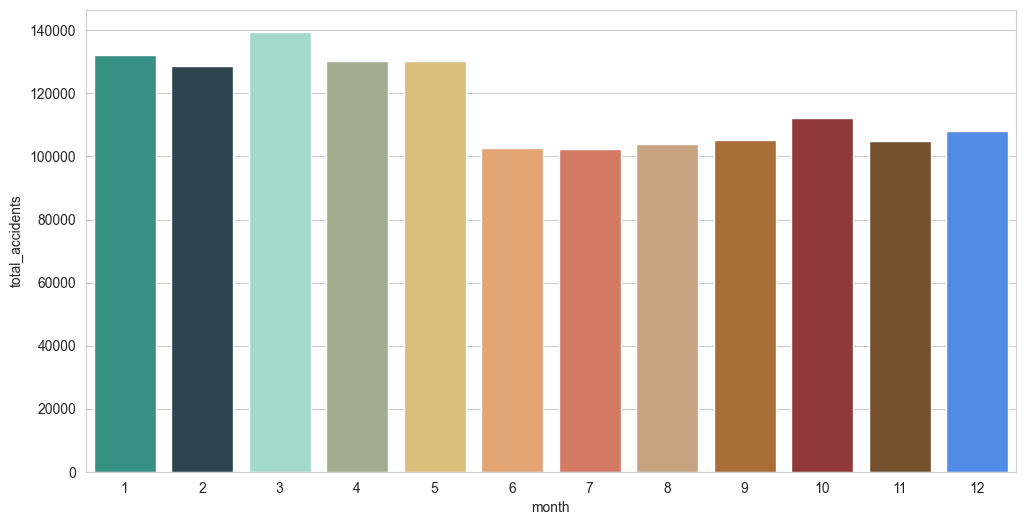

In [8]:
# Рисуем столбчатую диаграмму по месяцам
fig, ax = plt.subplots(figsize=(12, 6))

month_colors = {
    '1': "#2A9D8F",  # Глубокий холодный бирюзовый (зима)
    '2': "#264653",  # Тёмный сине-серый (зима)
    '3': "#99E2D0",  # Светлый бирюзовый (весна) - сохранён
    '4': "#A3B18A",  # Приглушенный оливковый (весна)
    '5': "#E9C46A",  # Мягкий золотистый (весна)
    '6': "#F4A261",  # Тёплый песочный (лето)
    '7': "#E76F51",  # Приглушенный терракотовый (лето)
    '8': "#D4A373",  # Нежный кораллово-бежевый (лето)
    '9': "#BC6C25",  # Тёплый амбровый (осень)
    '10': "#9E2A2B",  # Глубокий винный (осень)
    '11': "#7F4F24",  # Тёмный охра (осень)
    '12': "#3A86FF"  # Яркий ледяной синий (зима)
}

sns.barplot(
    x='month',
    y='total_accidents',
    data=collisions_by_month,
    palette=month_colors,
    ax=ax
)

plt.show()

#### Аналитические задачи

Составим 6 задач и предоставим порядок решения для двух из них.

1. Анализ серьезности повреждений транспортного средства, исходя из состояния дороги в момент ДТП.
2. Количество участников ДТП в зависимости от типа транспортного средства.
3. Количество участников ДТП в зависимости от состояния дороги.
4. Количество ДТП на каждом типе дороги в зависимости от времени суток.
5. Как отличается средняя сумма страховки в зависимости от типа транспортного средства.
6. Как возраст автомобиля влияет на вероятность ДТП.

##### Порядок решения задачи №5

Для того чтобы выяснить, как отличается средняя сумма страховки в зависимости от типа транспортного средства, мы будем использовать таблицы **parties** и **vehicles**.
1. Соединяем таблицы **parties** и **vehicles** по ключам **case_id**. Нам не нужно получать уникальные идентификаторы, так как мы будем использовать только тип транспортного средства и сумму страховки. Плюс ко всему, для каждого участника строки будут дублироваться, со своими значениями.
2. Считаем среднюю сумму страховки.
3. Группируем данные по типу транспортного средства, используя операторы `GROUP BY` или оконную функцию.
4. Сортируем данные по убыванию средней суммы страховки.
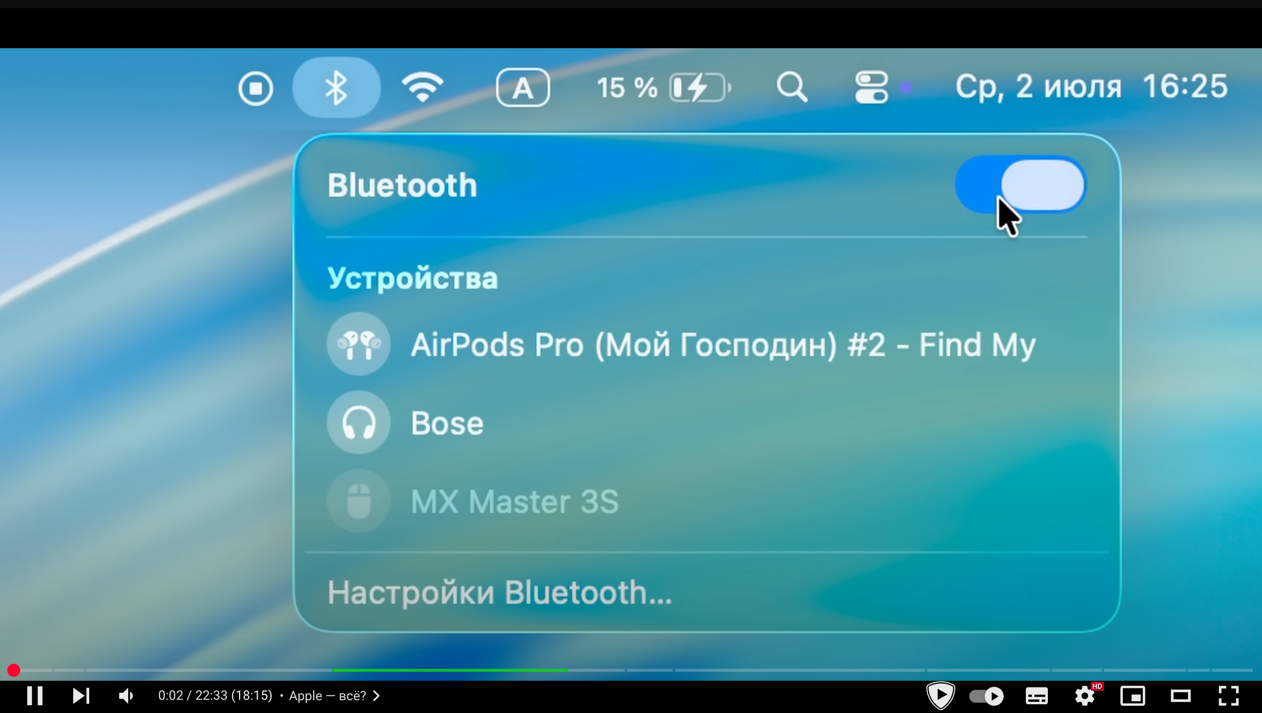

In [9]:
# Выводим среднюю сумму страховки по типу транспортного средства
with open('queries/task_5.sql', 'r') as file:
    query = file.read()

pd.read_sql_query(query, engine)

,vehicle_type,avg_insurance_amount
0,coupe,39.7
1,other,39.7
2,hatchback,38.2
3,sedan,37.8
4,minivan,37.0


Тип транспорта не сильно влияет на среднюю сумму страховки.

##### Порядок решения задачи №6
1. Отдельным запросом посмотрим минимальный, средний, и максимальный возраст автомобиля в таблице **vehicles**;
2. Соединим таблицы **collisions** и **vehicles** по **case_id**
3. Определим 3 типа возраста автомобиля:
   - новый (до 3 лет);
   - средний (от 3 до 10 лет);
   - старый (более 10 лет).
4. Сгруппируем данные по типу возраста автомобиля и посчитаем количество ДТП для каждого типа, используя оператор `GROUP BY` или оконную функцию.

In [10]:
# Выводим минимальный, средний и максимальный возраст автомобиля
with open('queries/task_6.1.sql', 'r') as file:
    query = file.read()

pd.read_sql_query(query, engine)

,min,avg_vehicle_age,max
0,0,5.137088,161


Мы видим, что минимальный возраст автомобиля составляет 0 лет, а максимальный — 161 год. Скорее всего это какой-то раритетный автомобиль, либо же ошибка в данных. Средний же возраст составляет 5 лет. Новым автомобилем будем считать автомобиль до 4 лет, средним — от 4 до 10 лет, старым — более 10 лет.

In [11]:
# Выводим количество ДТП по типу возраста автомобиля
with open('queries/task_6.2.sql', 'r') as file:
    query = file.read()

pd.read_sql_query(query, engine)

,vehicle_age_group,total_accidents
0,old,689010
1,middle-aged,572933
2,new,366649


Количество старых автомобилей, участвующих в ДТП, составляет почти вдвое больше, чем количество новых автомобилей. Количество дтп у автомобилей среднего возраста чуть ниже, чем у старых.

In [12]:
# Удаляем ненужные данные
del (
    collisions_by_month,
    query
)

### Вывод:

- Все таблицы имеют набор данных.
- Количество таблиц соответствует условию задачи.
- Общий ключ для связи таблиц — это **case_id** в таблице **collisions** и **parties**, а также **case_id** и **party_number** в таблице **vehicles**.

Мы создали 6 аналитических задач, которые помогут глубже понять данные и выявить закономерности в ДТП. Для двух задач мы прописали порядок решения и реализовали его.

## Загрузка данных

Выгрузим всю таблицу за 2012 год, где тип виновника — только машина (car), а ДТП привело к любым повреждениям транспортного средства, кроме типа SCRATCH (царапина). Определим признаки, которые нужно выгрузить.

Среди всех столбцов совершенно точно не понадобятся:
- **id** — уникальный идентификатор записи;
- **case_id** — уникальный идентификатор ДТП;
- **party_number** — уникальный идентификатор участника ДТП;
- **party_type** — тип участника ДТП (в нашем случае это только car);
- **collision_date** — дата ДТП. У нас задача бинарной классификации. Задача не подразумевает временных рядов, поэтому дата не нужна. Плюс ко всему, мы выгрузили данные только за 2012 год;
- **collision_time** — время ДТП. Аналогично пункту выше;
- **collision_damage** — повреждения транспортного средства. Серьезность происшествия не влияет на вероятность ДТП. Это является последствием ДТП;
- **party_count** — количество участников ДТП. Аналогично, это последствия ДТП;
- **type_of_collision** — тип столкновения. Это тоже последствия ДТП;
- **motor_vehicle_involved_with** — транспортное средство, участвующее в ДТП. Это тоже последствия ДТП. Это может быть важным признаком для модели, однако если мы поставим иную задачу: моделирование вероятности дтп от внешних условий. Грубо говоря, если мы моделируем улицу, и хотим узнать, как построить велодорожки/перекрестны/тротуары/пешеходные переходы, чтобы снизить вероятность ДТП, то этот признак будем для нас важен. Но перед нами стоит задача предсказания вероятности ДТП, основываясь на внутренних факторах — то есть водителе;
- **vehicle_type** — тип транспортного средства, скорее всего нет большой разницы между типами автомобилей, которые участвуют в ДТП, будь то купе, или хэтчбек;
- **vehicle_transmission** — тип трансмиссии. Аналогично предыдущему пункту, разница скорее всего минимальна;


Далее нам необходимо провести корреляционный анализ, чтобы понять, какие факторы больше всего влияют на вероятность ДТП. Потенциально для нас имеют значение следующие столбцы:
- **location_type** — тип дороги так же скорее всего не вносит большой вклад в вероятность ДТП;
- **country_city_location** — номер географического района, где произошло ДТП. Для нас это бы имело значение, если бы мы анализировали ДТП только в одном городе. Однако может быть полезно для оценки риска с учетом маршрута;
- **county_location** — название географического района, где произошло ДТП;
- **lighting** — освещение. Этот признак потенциально может быть очень важен для нас, однако у машины есть свои осветительные приборы;
- **control_device** — в описании данных нет информации, какие данные в этом столбце, но это может быть либо устройство управления, либо устройство контроля. В первом случае это неважный фактор, так как это внешний фактор, а во втором же случае это может быть устройство контроля состояния водителя, как например, алкотестер;
- **insurance_premium** — сумма страховки. Это может быть потенциально важным фактором, так как у неопытных водителей страховка может быть выше, а следовательно косвенно поможет модели делать правильное предсказание;
- **cellphone_in_use** — возможности разговаривать по громкой связи. Потенциально важный фактор, так как отвлекает водителя от дороги.
- **distance** — расстояние от главной дороги в метрах. Для модели данный признак скорее всего не будет иметь значения, однако возможно, он поможет строить маршрут, избегая/прокладывая маршрут через главную дорогу;
- **direction** — направление движения. Скорее всего не имеет значения, однако в задаче сказано оценить риск дтп по выбранному маршруту движения;
- **intersection** — произошло ли ДТП на перекрестке. Это внешний фактор, но может быть это поможет строить маршруты, содержащие меньшее количество перекрестков.


Столбцы, которые совершенно точно понадобятся:
- **vehicle_age** — возраст автомобиля. Это важный фактор, так как старые автомобили могут быть менее безопасными, и сложными в управлении чем новые;
- **primary_coll_factor** — основной фактор аварии. Это основной фактор, который привел к ДТП;
- **pcf_violation_category** — категория нарушения, связанная с основным фактором аварии. Это может быть полезно для понимания, какие нарушения чаще всего приводят к ДТП;
- **road_surface** — состояние дороги. Покрытие дороги сильно влияет на вероятность дтп в купе с состоянием водителя;
- **road_condition** — дорожное состояние. Наличие ям, сыпучего материала, итд сильно влияет на вероятность ДТП;
- **weather_1** — погодные условия. Погода влияет на видимость и состояние дороги, что может привести к ДТП;
- **party_sobriety** — трезвость водителя. Это важный фактор, так как состояние водителя влияет на вероятность ДТП;
- **party_drug_physical** — трезвость водителя от наркотических веществ. Аналогично пункту выше;
- **at_fault** — виновник ДТП. Это целевой признак, который мы будем предсказывать.

В конечном итоге в наш запрос входят следующие столбцы:
- `vehicle_age`
- `location_type`
- `country_city_location`
- `country_location`
- `distance`
- `direction`
- `intersection`
- `primary_collision_factor`
- `pcf_violation_category`
- `weather_1`
- `road_surface`
- `road_condition_1`
- `lighting`
- `control_device`
- `insurance_premium`
- `party_sobriety`
- `party_drug_physical`
- `cellphone_in_use`
- `at_fault`

In [13]:
# Пишем запрос с условиями
with open('queries/load_df.sql', 'r') as file:
    query = file.read()

# Сохраняем запрос в датафрейм
df = pd.read_sql_query(query, engine)

# Выводим датафрейм
df

,vehicle_age,location_type,county_city_location,county_location,distance,direction,intersection,primary_collision_factor,pcf_violation_category,weather_1,road_surface,road_condition_1,lighting,control_device,insurance_premium,party_sobriety,party_drug_physical,cellphone_in_use,at_fault
0,NaN,None,1942,los angeles,340.0,north,0.0,vehicle code violation,improper turning,clear,dry,normal,dark with street lights,none,58.0,had not been drinking,None,0.0,0
1,NaN,None,1942,los angeles,340.0,north,0.0,vehicle code violation,improper turning,clear,dry,normal,dark with street lights,none,NaN,impairment unknown,G,NaN,1
2,NaN,None,1932,los angeles,390.0,east,0.0,vehicle code violation,unsafe lane change,clear,dry,normal,daylight,none,45.0,had not been drinking,None,0.0,0
3,NaN,None,1932,los angeles,390.0,east,0.0,vehicle code violation,unsafe lane change,clear,dry,normal,daylight,none,21.0,had not been drinking,None,0.0,0
4,NaN,None,1932,los angeles,390.0,east,0.0,vehicle code violation,unsafe lane change,clear,dry,normal,daylight,none,NaN,impairment unknown,G,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226979,NaN,None,3400,sacramento,18.0,east,0.0,vehicle code violation,improper turning,clear,dry,normal,dark with street lights,none,27.0,had not been drinking,None,0.0,1
226980,NaN,ramp,0712,contra costa,200.0,south,0.0,other than driver,other than driver (or pedestrian),clear,dry,normal,daylight,none,45.0,had not been drinking,None,0.0,0
226981,NaN,highway,3001,orange,600.0,south,0.0,vehicle code violation,speeding,clear,dry,normal,daylight,none,NaN,impairment unknown,G,0.0,0
226982,NaN,highway,3001,orange,600.0,south,0.0,vehicle code violation,speeding,clear,dry,normal,daylight,none,61.0,had not been drinking,None,0.0,0


In [14]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226984 entries, 0 to 226983
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   vehicle_age               115046 non-null  float64
 1   location_type             101712 non-null  object 
 2   county_city_location      226984 non-null  object 
 3   county_location           226984 non-null  object 
 4   distance                  226984 non-null  float64
 5   direction                 175734 non-null  object 
 6   intersection              225895 non-null  float64
 7   primary_collision_factor  226197 non-null  object 
 8   pcf_violation_category    222903 non-null  object 
 9   weather_1                 226205 non-null  object 
 10  road_surface              225492 non-null  object 
 11  road_condition_1          225678 non-null  object 
 12  lighting                  226177 non-null  object 
 13  control_device            225905 non-null  o

Не все признаки приведены к нужному типу данных. После обработки пропусков нам надо будет привести некоторые столбцы к целочисленному типу данных. Большинство из них можно будет привести к `int8` для экономии памяти.

### Вывод:

Мы выбрали все данные, которые могут нам понадобиться для обучения модели, и посмотрели, к какому типу данных принадлежат столбцы. После обработки пропусков и данных, приведем все данные к корректному типу данных.

## Предобработка данных

Проведем предобработку данных. Посмотрим на распределения числовых значений, количество пропусков, наличие явных и неявных дубликатов

In [15]:
# Объявим числовые и категориальные столбцы
num_cols = ['vehicle_age', 'distance', 'insurance_premium']
cat_cols = ['control_device',
            'county_city_location',
            'county_location',
            'direction',
            'intersection',
            'lighting',
            'location_type',
            'party_drug_physical',
            'party_sobriety',
            'pcf_violation_category',
            'primary_collision_factor',
            'road_condition_1',
            'road_surface',
            'weather_1',
            'cellphone_in_use',
            'at_fault']

In [16]:
# Посмотрим на общее количество пропусков в числовых столбцах
df[num_cols].isna().sum()

vehicle_age          111938
distance                  0
insurance_premium     20695
dtype: int64

In [17]:
# Посмотрим на общее количество пропусков в категориальных столбцах
df[cat_cols].isna().sum()

control_device                1079
county_city_location             0
county_location                  0
direction                    51250
intersection                  1089
lighting                       807
location_type               125272
party_drug_physical         200553
party_sobriety                4024
pcf_violation_category        4081
primary_collision_factor       787
road_condition_1              1306
road_surface                  1492
weather_1                      779
cellphone_in_use             27693
at_fault                         0
dtype: int64

### Предобработка числовых столбцов

Посмотрим на распределения столбцов, наличие выбросов, обработаем пропуски

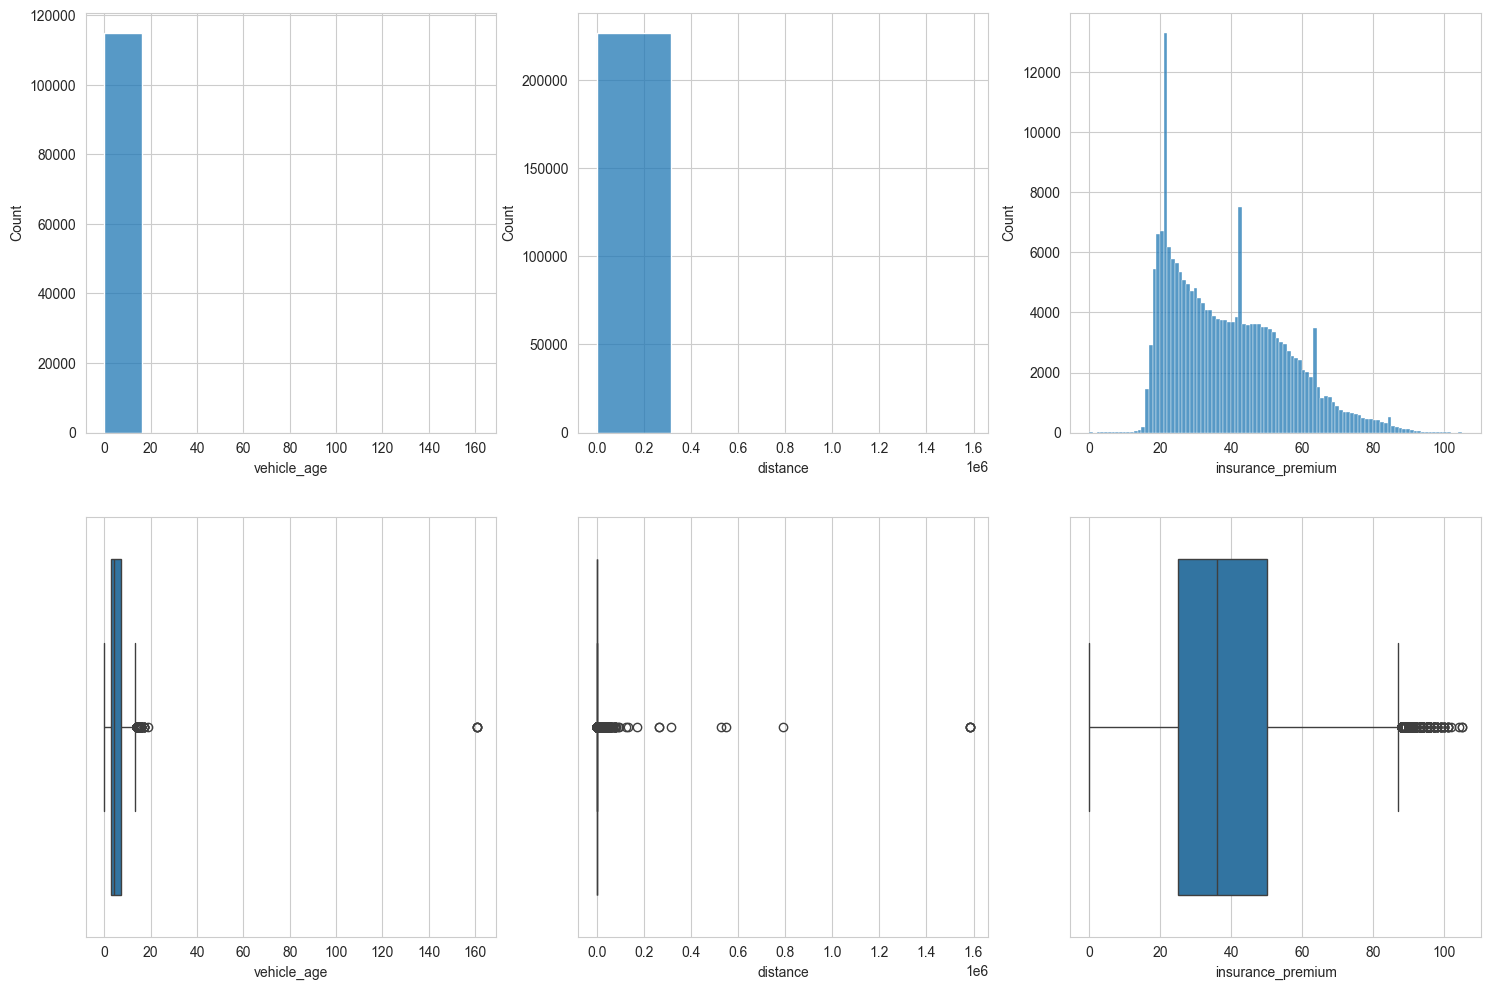

In [18]:
# Рисуем гистограмму и боксплот для числовых столбцов
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
bins = [10, 5, 100]

for i, col in enumerate(num_cols):
    # Гистограммы
    sns.histplot(df[col],
                 ax=axes[0, i],
                 bins=bins[i], )
    # Боксплот
    sns.boxplot(df[col],
                ax=axes[1, i],
                orient='h')

plt.show()

Мы видим, что у нас есть по одному аномально большому выбросу в столбцах с возрастом и расстоянием. Остальные выбросы лежат "в пределах нормы". Удалим самый большой выброс, чтобы модели было легче обучаться.

In [19]:
# Смотрим на выброс в возрасте авто
df['vehicle_age'].sort_values(ascending=False)

22723     161.0
83256     161.0
83255     161.0
22724     161.0
126100     19.0
          ...  
226979      NaN
226980      NaN
226981      NaN
226982      NaN
226983      NaN
Name: vehicle_age, Length: 226984, dtype: float64

In [20]:
# Сохраняем индексы выбросов
rows_to_drop = df['vehicle_age'].sort_values(ascending=False).index[:4]

# Удаляем строки по индексу
df = df.drop(index=rows_to_drop, axis=0)

# Проверяем, все ли верно мы удалили
df['vehicle_age'].sort_values(ascending=False)

126100    19.0
103237    17.0
103238    17.0
165076    17.0
103891    17.0
          ... 
226979     NaN
226980     NaN
226981     NaN
226982     NaN
226983     NaN
Name: vehicle_age, Length: 226980, dtype: float64

In [21]:
# Смотрим на выбросы в дистанции
df['distance'].sort_values(ascending=False)

80701     1584000.0
27987     1584000.0
80700     1584000.0
27988     1584000.0
120511     792000.0
            ...    
183368          0.0
47545           0.0
183370          0.0
183371          0.0
71352           0.0
Name: distance, Length: 226980, dtype: float64

In [22]:
# Сохраняем индексы выбросов
rows_to_drop = df['distance'].sort_values(ascending=False).index[:4]

# Удаляем строки по индексу
df = df.drop(index=rows_to_drop, axis=0)

# Проверяем, все ли верно мы удалили
df['distance'].sort_values(ascending=False)

120511    792000.0
175161    549120.0
88341     528000.0
130493    316800.0
47728     264000.0
            ...   
86632          0.0
64188          0.0
64189          0.0
86629          0.0
53300          0.0
Name: distance, Length: 226976, dtype: float64

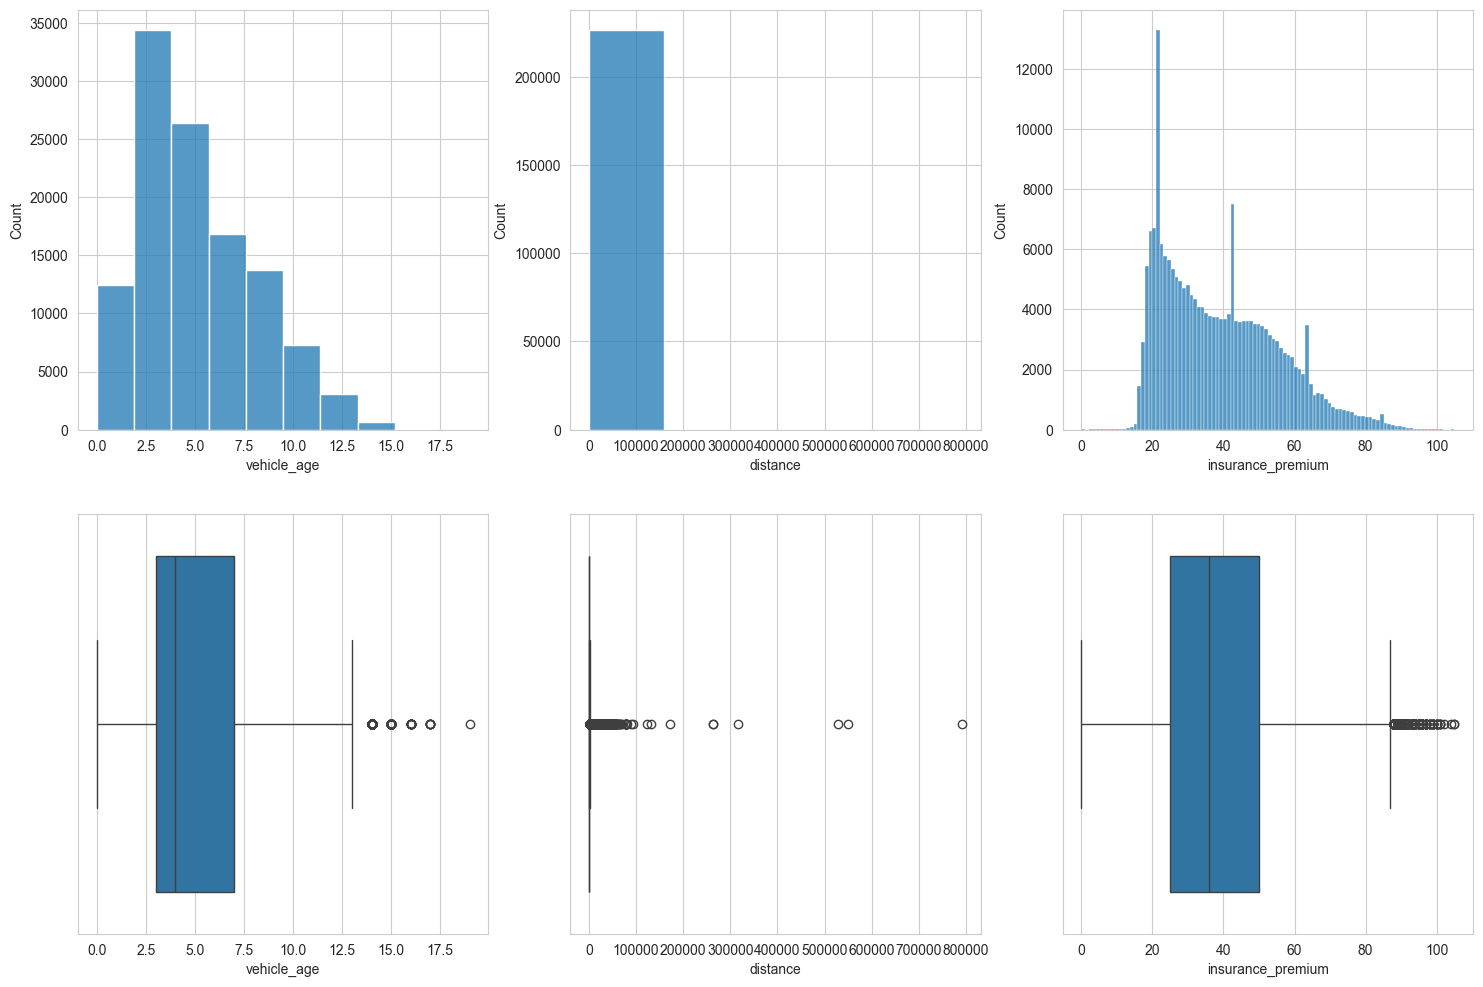

In [23]:
# Рисуем гистограмму и боксплот для числовых столбцов
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
bins = [10, 5, 100]

for i, col in enumerate(num_cols):
    # Гистограммы
    sns.histplot(df[col],
                 ax=axes[0, i],
                 bins=bins[i], )
    # Боксплот
    sns.boxplot(df[col],
                ax=axes[1, i],
                orient='h')

plt.show()

### Предобработка категориальных столбцов

Проверим наличие явных и неявных дубликатов

In [27]:
# Посмотрим на уникальных значений в категориальных столбцах
df[cat_cols].nunique()

control_device                4
county_city_location        513
county_location              58
direction                     4
intersection                  2
lighting                      5
location_type                 3
party_drug_physical           5
party_sobriety                6
pcf_violation_category       22
primary_collision_factor      5
road_condition_1              8
road_surface                  4
weather_1                     7
cellphone_in_use              2
at_fault                      2
dtype: int64

Во всех столбцах, кроме `country_city_location` и `country_location` совсем немного уникальных значений. Проверим их на наличие неявных дубликатов

In [29]:
# Выводим уникальные значения в каждом столбце, кроме 'county_city_location', 'country_location'
for col in list(set(cat_cols) - {'county_city_location', 'county_location'}):
    print(col, ':',df[col].unique(), end='\n\n')

direction : ['north' 'east' 'west' None 'south']

control_device : ['none' 'functioning' None 'not functioning' 'obscured']

party_drug_physical : [None 'G' 'not applicable' 'under drug influence' 'sleepy/fatigued'
 'impairment - physical']

weather_1 : ['clear' 'cloudy' 'snowing' 'raining' None 'fog' 'wind' 'other']

location_type : [None 'highway' 'ramp' 'intersection']

primary_collision_factor : ['vehicle code violation' None 'unknown' 'other improper driving'
 'other than driver' 'fell asleep']

intersection : [ 0.  1. nan]

pcf_violation_category : ['improper turning' 'unsafe lane change' 'automobile right of way' None
 'speeding' 'dui' 'unsafe starting or backing' 'unknown'
 'wrong side of road' 'following too closely' 'other hazardous violation'
 'traffic signals and signs' 'other improper driving'
 'other than driver (or pedestrian)' 'improper passing' 'other equipment'
 'pedestrian right of way' 'pedestrian violation' 'impeding traffic'
 'hazardous parking' 'brakes' 'fell asl

Столбцы `intersection` и `location_type` являются сами по себе неявными дубликатами. Столбец `intersection` является булевым и обозначает только то, произошла ли авария на перекрестке. В столбце `location_type` есть значение "intersection". Удалим столбец `intersection`. Предварительно посмотрим, корректно ли заполнены значения.

В столбце `control_device` 'not functioning' обозначает, что средство контроля предусмотрено, просто оно не работает. 'None' — означает, что в транспортном средстве вообще нет средства контроля. Концептуально результат один и тот же, контроль не пройден. Можно объединить эти значения

В столбце `lighting` есть значения 'dark with no street lights' и 'dark with street lights not functioning'. По сути разницы нет, объединим эти значения.

Во всех остальных столбцах неявных дубликатов нет. Большинство пропусков впоследствии мы заполним значением 'unknown', ибо он представлено как "пропуск" в столбцах

In [30]:
# Проверяем, корректно ли заполнены значения
df[['location_type', 'intersection']]

,location_type,intersection
0,None,0.0
1,None,0.0
2,None,0.0
3,None,0.0
4,None,0.0
...,...,...
226979,None,0.0
226980,ramp,0.0
226981,highway,0.0
226982,highway,0.0


In [32]:
# Заполняем значения
df.loc[df['intersection'] == 1, 'location_type'] = 'intersection'

# Проверяем, корректно ли теперь все заполнено
df[['location_type', 'intersection']]

,location_type,intersection
0,None,0.0
1,None,0.0
2,None,0.0
3,None,0.0
4,None,0.0
...,...,...
226979,None,0.0
226980,ramp,0.0
226981,highway,0.0
226982,highway,0.0


In [ ]:
# Удаляем столбец с перекрестком
df = df.drop('intersection', axis=1)

# Заменяем средство контроля
df['control_device'] = df['control_device'].replace('not functioning', 'none')

# Заменяем освещение
df['lighting'] = df['lighting'].replace('dark with street lights not functioning', 'dark with no street lights')

In [ ]:
# Проверяем, корректно ли все привелось
for col in list(set(cat_cols) - {'county_city_location', 'county_location'}):
    print(col, ':',df[col].unique(), end='\n\n')

### Обработка пропусков

В большинстве столбцов заменим пропуски на 'unknown', так как они там уже указаны. В остальных столбцах заменим пропуски контекстно

#TODO указать, в каких конкретно столбцах на какие значения заменим пропуски

In [24]:
#TODO Раскомментировать после обработки пропусков
# Преобразуем столбцы к нужному типу данных
# df['vehicle_age'] = df['vehicle_age'].astype('int8')
# df['distance'] = df['distance'].astype('int64')
# df['intersection'] = df['intersection'].astype('int8')
# df['insurance_premium'] = df['insurance_premium'].astype('int16')
# df['cellphone_in_use'] = df['cellphone_in_use'].astype('int8')
# df['at_fault'] = df['at_fault'].astype('int8')
#
# # Проверяем, корректно ли все перевелось
# df.info()

In [25]:
# Удаляем ненужные переменны
del (
    rows_to_drop
)

### Вывод:


## Исследовательский анализ данных

### Вывод:


## Корреляционный анализ

### Вывод:


## Feature Engineering

### Вывод:

## Создание моделей для оценки водительского риска

1. Подготовим набор данных на основе первичного предположения заказчика.
2. Проведем первичный отбор факторов, необходимых для модели. Изучим описание факторов. Отберем те, которые могут влиять на вероятность ДТП.
3. Проведем статистическое исследование отобранных факторов.
    - По результату исследовательского анализа внесем корректировки, если они нужны.
    - Категоризируем исходные данные, проведем масштабирование.
    - Подготовим обучающую и тестовую выборки.

### Подготовка данных

### Обучение моделей

### Сравнение моделей

### Вывод:

- Все таблицы имеют набор данных.
- Количество таблиц соответствует условию задачи.
- Общий ключ для связи таблиц — это **case_id** в таблице **collisions** и **parties**, а также **case_id** и **party_number** в таблице **vehicles**.

## Анализ важности факторов ДТП

#### Вывод:

## Общий вывод: